In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [10]:
train = pd.read_csv("preprocessed_train_data.csv", index_col = 0)
test = pd.read_csv("preprocessed_test_data.csv", index_col = 0)

trained_tweets = train['keyword']+train['text']
test_tweets = test['keyword']+test['text']

In [11]:
state = 12  
test_size = 0.30
  
X_train, X_test, y_train, y_test = train_test_split(trained_tweets, train['target'],  
    test_size=test_size, random_state=state)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

word_vectorizer = TfidfVectorizer(
    analyzer='word',
    stop_words='english',
    ngram_range=(1, 3),
    lowercase=True,
    min_df=5,
    max_features=30000)

char_vectorizer = TfidfVectorizer(
    analyzer='char',
    stop_words='english',
    ngram_range=(3, 6),
    lowercase=True,
    min_df=5,
    max_features=50000)

vectorizer = FeatureUnion([('word_vectorizer', word_vectorizer),  ('char_vectorizer', char_vectorizer)])
vectorizer.fit(X_train)

X_train_vectors = vectorizer.transform(X_train).toarray()
X_test_vectors = vectorizer.transform(X_test).toarray()
print(X_train_vectors.shape, X_test_vectors.shape)

/home/neptune/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:520: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'stop_words' will not be used"


(5329, 44132) (2284, 44132)


In [13]:
gb_clf = GradientBoostingClassifier(n_estimators=120, learning_rate=0.075, max_features=100, max_depth=25, random_state=0)
gb_clf.fit(X_train_vectors, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.075, loss='deviance', max_depth=25,
                           max_features=100, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=120,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [14]:
cv = CountVectorizer()
cv_x_train = cv.fit_transform(X_train).toarray()
cv_x_test = cv.transform(X_test).toarray()
clf_nb = MultinomialNB()
clf_nb.fit(cv_x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

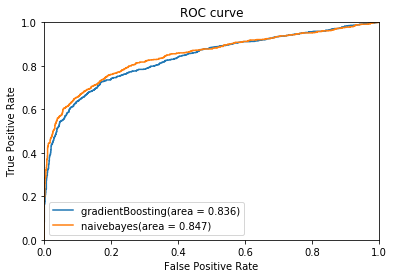

In [15]:
from sklearn.metrics import roc_curve, auc

y_gb  = gb_clf.predict_proba(X_test_vectors)
curve_gb   = roc_curve(y_test, y_gb[:, 1])
auc_gb   = auc(curve_gb[0], curve_gb[1])

y_nb  = clf_nb.predict_proba(cv_x_test)
curve_nb   = roc_curve(y_test, y_nb[:, 1])
auc_nb  = auc(curve_nb[0], curve_nb[1])


plt.plot(curve_gb[0], curve_gb[1], label='gradientBoosting(area = %0.3f)' % auc_gb)
plt.plot(curve_nb[0], curve_nb[1], label='naivebayes(area = %0.3f)' % auc_nb)



plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve');

plt.legend();